In [158]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import r2_score

In [159]:
dataset = r'..\data\cleaned_fish_shellfish_dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C">Agenda</span>
* jeg har brugt inspirration fra opgaven ML/Linear-Regression.ipynb fra Doras github repo 

### <span style="color:#1E824C">Train and Model</span>

#### Choose Dependent and Independent Variables

In [160]:

Y_price = df['price_kr'].values.reshape(-1, 1)
X_price = df['season_availability_Summer'].values.reshape(-1, 1)

In [161]:
Y_profit = df['profit_kr'].values.reshape(-1, 1)
X_profit = df['cost_kr'].values.reshape(-1, 1)


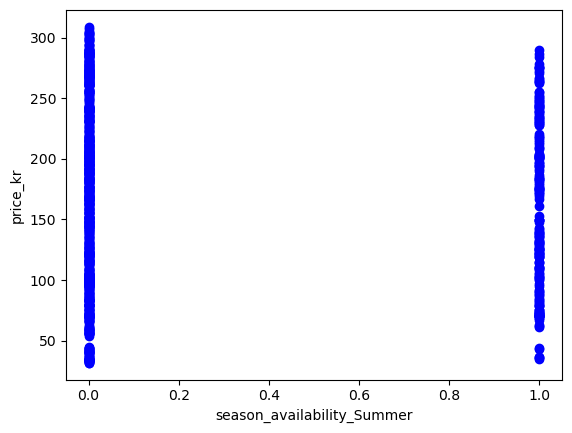

In [162]:
plt.ylabel('price_kr')
plt.xlabel('season_availability_Summer')
plt.scatter(X_price, Y_price, color='blue')
plt.show()

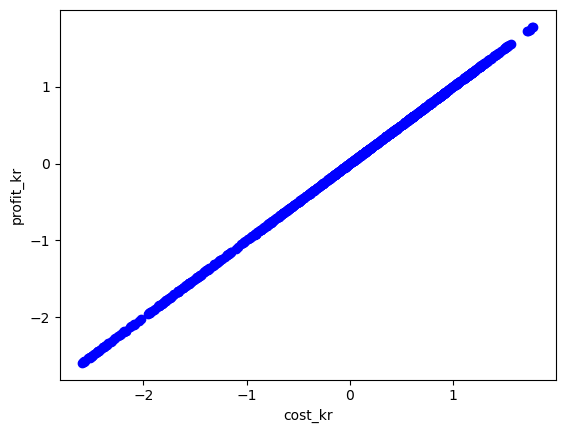

In [163]:
plt.ylabel('profit_kr')
plt.xlabel('cost_kr')
plt.scatter(Y_profit, Y_profit, color='blue')
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

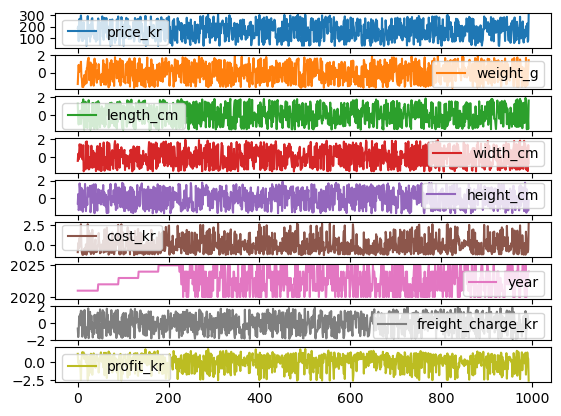

In [164]:
df.plot.line(subplots=True)

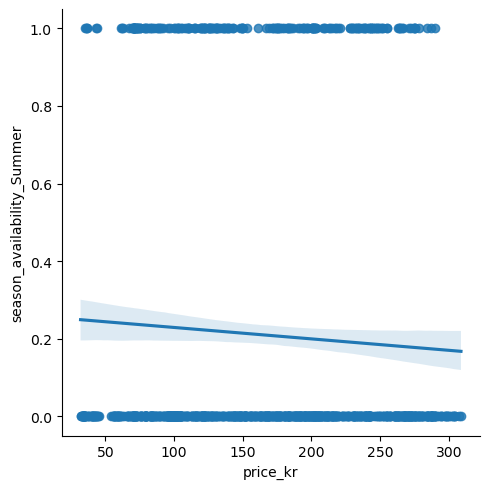

In [165]:
sns.lmplot(x='price_kr',y='season_availability_Summer',data=df,fit_reg=True) 


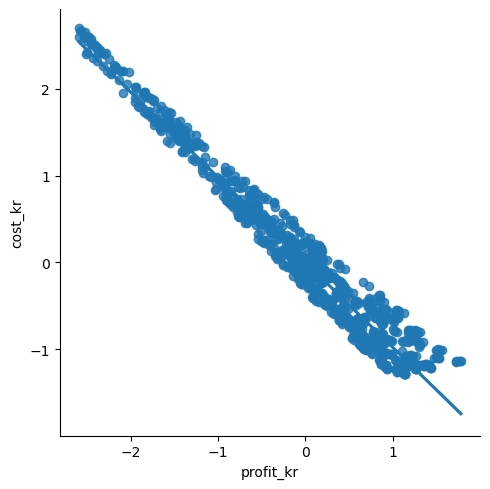

In [166]:
sns.lmplot(x='profit_kr',y='cost_kr',data=df,fit_reg=True) 


#### Split the data

In [167]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, Y_price, random_state=123, test_size=0.15) 

In [168]:
print(X_train_price.shape)
print(y_train_price.shape)
print(X_test_price.shape)
print(y_test_price.shape)

(844, 1)
(844, 1)
(150, 1)
(150, 1)


In [169]:
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X_profit, Y_profit, test_size=0.15, random_state=123)

In [170]:
print(X_train_profit.shape)
print(X_test_profit.shape)
print(y_train_profit.shape)
print(y_test_profit.shape)

(844, 1)
(150, 1)
(844, 1)
(150, 1)


#### Train a ML model

In [171]:
price_model = LinearRegression()

In [172]:
price_model.fit(X_train_price, y_train_price)
price_model

LinearRegression()

In [173]:
a = price_model.coef_
b = price_model.intercept_

In [174]:
profit_model = LinearRegression()
profit_model.fit(X_train_profit, y_train_profit)

LinearRegression()

In [175]:
a2 = profit_model.coef_
b2 = profit_model.intercept_

#### Test the models 

In [177]:
y_pred_price = price_model.predict(X_test_price)
print("Predicted prices:", y_pred_price[:5])

Predicted prices: [[168.41264264]
 [168.41264264]
 [168.41264264]
 [158.66286517]
 [158.66286517]]


In [178]:
y_pred_profit = profit_model.predict(X_test_profit)
print("Predicted profits:", y_pred_profit[:5])

Predicted profits: [[-0.61702931]
 [ 0.46083922]
 [ 0.49760452]
 [-1.19654046]
 [ 1.00613614]]


#### Evaluate both models

In [ ]:
# MAE
mae_price = metrics.mean_absolute_error(y_test_price, y_pred_price)
print(mae_price)

62.95213249654148


In [ ]:
# MAE
mae_profit = metrics.mean_absolute_error(y_test_profit, y_pred_profit)
print(mae_profit)

0.15736191539075248


In [181]:
# MSE
mse_price = metrics.mean_squared_error(y_test_price, y_pred_price)
print(mse_price)

5353.84249004701


In [182]:
#MSE 
mse_profit = metrics.mean_squared_error(y_test_profit, y_pred_profit)
print(mse_profit)

0.03899114482718097


In [183]:
# RMSE
rmse_price = np.sqrt(metrics.mean_squared_error(y_test_price, y_pred_price))
print(rmse_price)

73.16995619820344


In [184]:
# RMSE
rmse_profit = np.sqrt(metrics.mean_squared_error(y_test_profit, y_pred_profit))
print(rmse_profit)

0.19746175535323535



#### Calculate R-squared